<a href="https://colab.research.google.com/github/dani1974/ciencia_dados/blob/main/pcaipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1. Definição do Problema**

##**1.1.  Identificar o objetivo do projeto.**

##**1.2. Definir perguntas de pesquisa**

##**2. Coleta e Integração de Dados**

Os dados foram extraídos de duas fontes principais:

*   **DATASUS:** Informações sobre mortalidade por diarreia
*   **IPS Brasil:** Indicadores socioeconômicos e ambientais.
*   Foi realizada a integração dos datasets pelo código do município tratado no excel, resultando em um conjunto consolidado com 735 registros e 32
*   A periodicidade dos datasets são mensais referente ao ano de 2023

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes # para importar o dataset diabetes
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM

In [ ]:
import pandas as pd

# Configurar o pandas para exibir todas as colunas
pd.set_option('display.max_columns', None)

# Carregar os dados de cada estado de qualidade da água
df1= pd.read_excel('/content/drive/MyDrive/Colab Notebooks/df_final041124.xlsx')

In [ ]:

display(df1.head())

,cod_mu,cod_municipio,nome_municipio,estado,nome_regiao,capital,Amazônia Legal?,IPS Brasil,Necessidades Humanas Básicas,Nutrição e Cuidados Médicos Básicos,Água e Saneamento,Moradia,Segurança Pessoal,Acesso à Informação e Comunicação,Qualidade do Meio Ambiente,População residente Censo 2022,PIB Real per capita (R$/hab.) 2021 Pop Censo 2022,Mortalidade Infantil até 5 anos,Mortalidade Ajustada por Condições Sensíveis à Atenção Primária,Hospitalizações por Condições Sensíveis à Atenção Primária,Cobertura Vacinal (poliomielite),Subnutrição,Abastecimento de Água Via Rede de Distribuição,Índice de Abastecimento de Água,Esgotamento Sanitário Adequado,Índice de Perdas de Água na Distribuição,Domicílios com Coleta de Resíduos Adequada,Expectativa de Vida,Mortalidade entre 15 e 50 anos,Mortalidades por Doenças Crônicas Não Transmissíveis,Obesidade,Índice de Vulnerabilidade Climática dos Municípios,Supressão da Vegetação Primária e Secundária,TARGET
0,110001,1100015,Alta Floresta D'Oeste (RO),RO,Norte,Não,1,50.947109,59.696415,59.818425,31.922031,88.364066,58.681136,55.377144,42.898287,21494,34420.332358,10.869565,141.039047,2607.034997,77.111717,5.169239,25.464570,46.72,4.038257,55.66,54.502757,70.75,2.698813,603.956035,20.496261,51.82,22.405302,4
1,110002,1100023,Ariquemes (RO),RO,Norte,Não,1,55.974754,66.456103,64.947554,55.901657,93.063389,51.911813,71.948561,54.610367,96833,33389.363701,23.255814,168.364383,1042.753806,73.799884,4.858950,48.105446,84.70,6.134821,32.94,91.064673,73.36,2.488347,496.145998,27.148270,49.41,43.298479,141
2,110003,1100031,Cabixi (RO),RO,Norte,Não,1,51.364540,55.096942,59.155513,42.274765,88.328869,30.628621,48.551920,39.650217,5351,44879.911717,22.017030,158.685738,2348.529702,81.250000,4.317789,40.748899,48.00,18.915929,43.93,66.740088,70.39,2.423263,418.795509,26.818516,56.05,45.360129,0
3,110004,1100049,Cacoal (RO),RO,Norte,Não,1,61.845266,73.413193,66.019086,72.762717,92.044031,62.826938,68.798795,59.023950,86887,32372.707032,11.086475,184.701831,1330.772079,85.152838,4.373445,81.408979,78.81,70.724346,51.83,84.866956,74.27,1.676586,532.412325,25.057980,51.33,26.435790,120
4,110005,1100056,Cerejeiras (RO),RO,Norte,Não,1,58.708788,65.540396,68.542447,44.693278,97.222767,51.703092,66.556471,54.609736,15890,47102.653877,3.676471,108.849590,1970.412730,100.000000,5.035066,39.366805,64.10,19.602182,54.94,89.158938,72.94,2.417795,360.971853,27.772727,50.39,15.758085,21


In [ ]:
# Contando as linhas e colunas do DataFrame
num_linhas, num_colunas = df1.shape
num_linhas, num_colunas


(735, 34)

In [ ]:
df = df1

In [ ]:
columns_to_remove = ['cod_municipio', 'nome_municipio', 'estado', 'nome_regiao', 'capital', 'Amazônia Legal?']
df = df.drop(columns=columns_to_remove)

display(df.head())

,cod_mu,IPS Brasil,Necessidades Humanas Básicas,Nutrição e Cuidados Médicos Básicos,Água e Saneamento,Moradia,Segurança Pessoal,Acesso à Informação e Comunicação,Qualidade do Meio Ambiente,População residente Censo 2022,PIB Real per capita (R$/hab.) 2021 Pop Censo 2022,Mortalidade Infantil até 5 anos,Mortalidade Ajustada por Condições Sensíveis à Atenção Primária,Hospitalizações por Condições Sensíveis à Atenção Primária,Cobertura Vacinal (poliomielite),Subnutrição,Abastecimento de Água Via Rede de Distribuição,Índice de Abastecimento de Água,Esgotamento Sanitário Adequado,Índice de Perdas de Água na Distribuição,Domicílios com Coleta de Resíduos Adequada,Expectativa de Vida,Mortalidade entre 15 e 50 anos,Mortalidades por Doenças Crônicas Não Transmissíveis,Obesidade,Índice de Vulnerabilidade Climática dos Municípios,Supressão da Vegetação Primária e Secundária,TARGET
0,110001,50.947109,59.696415,59.818425,31.922031,88.364066,58.681136,55.377144,42.898287,21494,34420.332358,10.869565,141.039047,2607.034997,77.111717,5.169239,25.464570,46.72,4.038257,55.66,54.502757,70.75,2.698813,603.956035,20.496261,51.82,22.405302,4
1,110002,55.974754,66.456103,64.947554,55.901657,93.063389,51.911813,71.948561,54.610367,96833,33389.363701,23.255814,168.364383,1042.753806,73.799884,4.858950,48.105446,84.70,6.134821,32.94,91.064673,73.36,2.488347,496.145998,27.148270,49.41,43.298479,141
2,110003,51.364540,55.096942,59.155513,42.274765,88.328869,30.628621,48.551920,39.650217,5351,44879.911717,22.017030,158.685738,2348.529702,81.250000,4.317789,40.748899,48.00,18.915929,43.93,66.740088,70.39,2.423263,418.795509,26.818516,56.05,45.360129,0
3,110004,61.845266,73.413193,66.019086,72.762717,92.044031,62.826938,68.798795,59.023950,86887,32372.707032,11.086475,184.701831,1330.772079,85.152838,4.373445,81.408979,78.81,70.724346,51.83,84.866956,74.27,1.676586,532.412325,25.057980,51.33,26.435790,120
4,110005,58.708788,65.540396,68.542447,44.693278,97.222767,51.703092,66.556471,54.609736,15890,47102.653877,3.676471,108.849590,1970.412730,100.000000,5.035066,39.366805,64.10,19.602182,54.94,89.158938,72.94,2.417795,360.971853,27.772727,50.39,15.758085,21


In [ ]:
# Obtendo os nomes das colunas do dataset
column_names = df.columns
column_names


Index(['cod_mu', 'IPS Brasil', 'Necessidades Humanas Básicas',
       'Nutrição e Cuidados Médicos Básicos', 'Água e Saneamento', 'Moradia',
       'Segurança Pessoal', 'Acesso à Informação e Comunicação',
       'Qualidade do Meio Ambiente', 'População residente Censo 2022',
       'PIB Real per capita (R$/hab.) 2021 Pop Censo 2022',
       'Mortalidade Infantil até 5 anos',
       'Mortalidade Ajustada por Condições Sensíveis à Atenção Primária',
       'Hospitalizações por Condições Sensíveis à Atenção Primária',
       'Cobertura Vacinal (poliomielite)', 'Subnutrição',
       'Abastecimento de Água Via Rede de Distribuição',
       'Índice de Abastecimento de Água', 'Esgotamento Sanitário Adequado',
       'Índice de Perdas de Água na Distribuição',
       'Domicílios com Coleta de Resíduos Adequada', 'Expectativa de Vida ',
       'Mortalidade entre 15 e 50 anos',
       'Mortalidades por Doenças Crônicas Não Transmissíveis ', 'Obesidade',
       'Índice de Vulnerabilidade Climáti

##**3. Exploração e Pré-Processamento de Dados**

*   Analisaram-se as distribuições estatísticas das variáveis para identificar outliers e padrões gerais.
*   Os outliers foram mantidos devido à heterogeneidade inerente aos estados da Amazônia Legal.
*   Valores ausentes foram tratados utilizando estratégias específicas para garantir a consistência do dataset.


##**4. Transformação**


##**4.1. Feature Engineering**

Foram criadas variáveis derivadas para enriquecer a representação do problema, incluindo 35 registros e 41

*   Populacao_Sem_Saneamento: Percentual de população sem abastecimento de água adequado
*   Pop_Sem_Saneamento_Por_ICSAP: Razão entre população sem saneamento e hospitalizações sensíveis à atenção primária
*   Razão entre população sem saneamento e hospitalizações sensíveis à atenção primária
*   ICSAP_Por_Habitante: Proporção de hospitalizações por habitante.
*   Nutrição_Ajustada_ICSAP: Produto entre o índice de nutrição e hospitalizações.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Verificar e listar colunas existentes no DataFrame
print("\nColunas disponíveis no DataFrame:")
print(df.columns)

# Criar variáveis derivadas se elas não existirem no DataFrame
if 'Populacao_Sem_Saneamento' not in df.columns:
    df['Populacao_Sem_Saneamento'] = 100 - df['Índice de Abastecimento de Água']

if 'Pop_Sem_Saneamento_Por_ICSAP' not in df.columns:
    df['Pop_Sem_Saneamento_Por_ICSAP'] = df['Populacao_Sem_Saneamento'] / df['Hospitalizações por Condições Sensíveis à Atenção Primária']

if 'ICSAP_Por_Habitante' not in df.columns:
    df['ICSAP_Por_Habitante'] = df['Hospitalizações por Condições Sensíveis à Atenção Primária'] / df['População residente Censo 2022']

if 'Razao_ICSAP_Pop' not in df.columns:
    df['Razao_ICSAP_Pop'] = df['Hospitalizações por Condições Sensíveis à Atenção Primária'] / df['População residente Censo 2022']

if 'Nutrição_Ajustada_ICSAP' not in df.columns:
    df['Nutrição_Ajustada_ICSAP'] = df['Nutrição e Cuidados Médicos Básicos'] * df['Hospitalizações por Condições Sensíveis à Atenção Primária']

if 'Densidade_por_Água' not in df.columns:
    df['Densidade_por_Água'] = df['População residente Censo 2022'] / df['Abastecimento de Água Via Rede de Distribuição']

if 'ICSAP_Por_Perdas_Água' not in df.columns:
    df['ICSAP_Por_Perdas_Água'] = df['Hospitalizações por Condições Sensíveis à Atenção Primária'] / df['Índice de Perdas de Água na Distribuição']





Colunas disponíveis no DataFrame:
Index(['cod_mu', 'IPS Brasil', 'Necessidades Humanas Básicas',
       'Nutrição e Cuidados Médicos Básicos', 'Água e Saneamento', 'Moradia',
       'Segurança Pessoal', 'Acesso à Informação e Comunicação',
       'Qualidade do Meio Ambiente', 'População residente Censo 2022',
       'PIB Real per capita (R$/hab.) 2021 Pop Censo 2022',
       'Mortalidade Infantil até 5 anos',
       'Mortalidade Ajustada por Condições Sensíveis à Atenção Primária',
       'Hospitalizações por Condições Sensíveis à Atenção Primária',
       'Cobertura Vacinal (poliomielite)', 'Subnutrição',
       'Abastecimento de Água Via Rede de Distribuição',
       'Índice de Abastecimento de Água', 'Esgotamento Sanitário Adequado',
       'Índice de Perdas de Água na Distribuição',
       'Domicílios com Coleta de Resíduos Adequada', 'Expectativa de Vida ',
       'Mortalidade entre 15 e 50 anos',
       'Mortalidades por Doenças Crônicas Não Transmissíveis ', 'Obesidade',
      

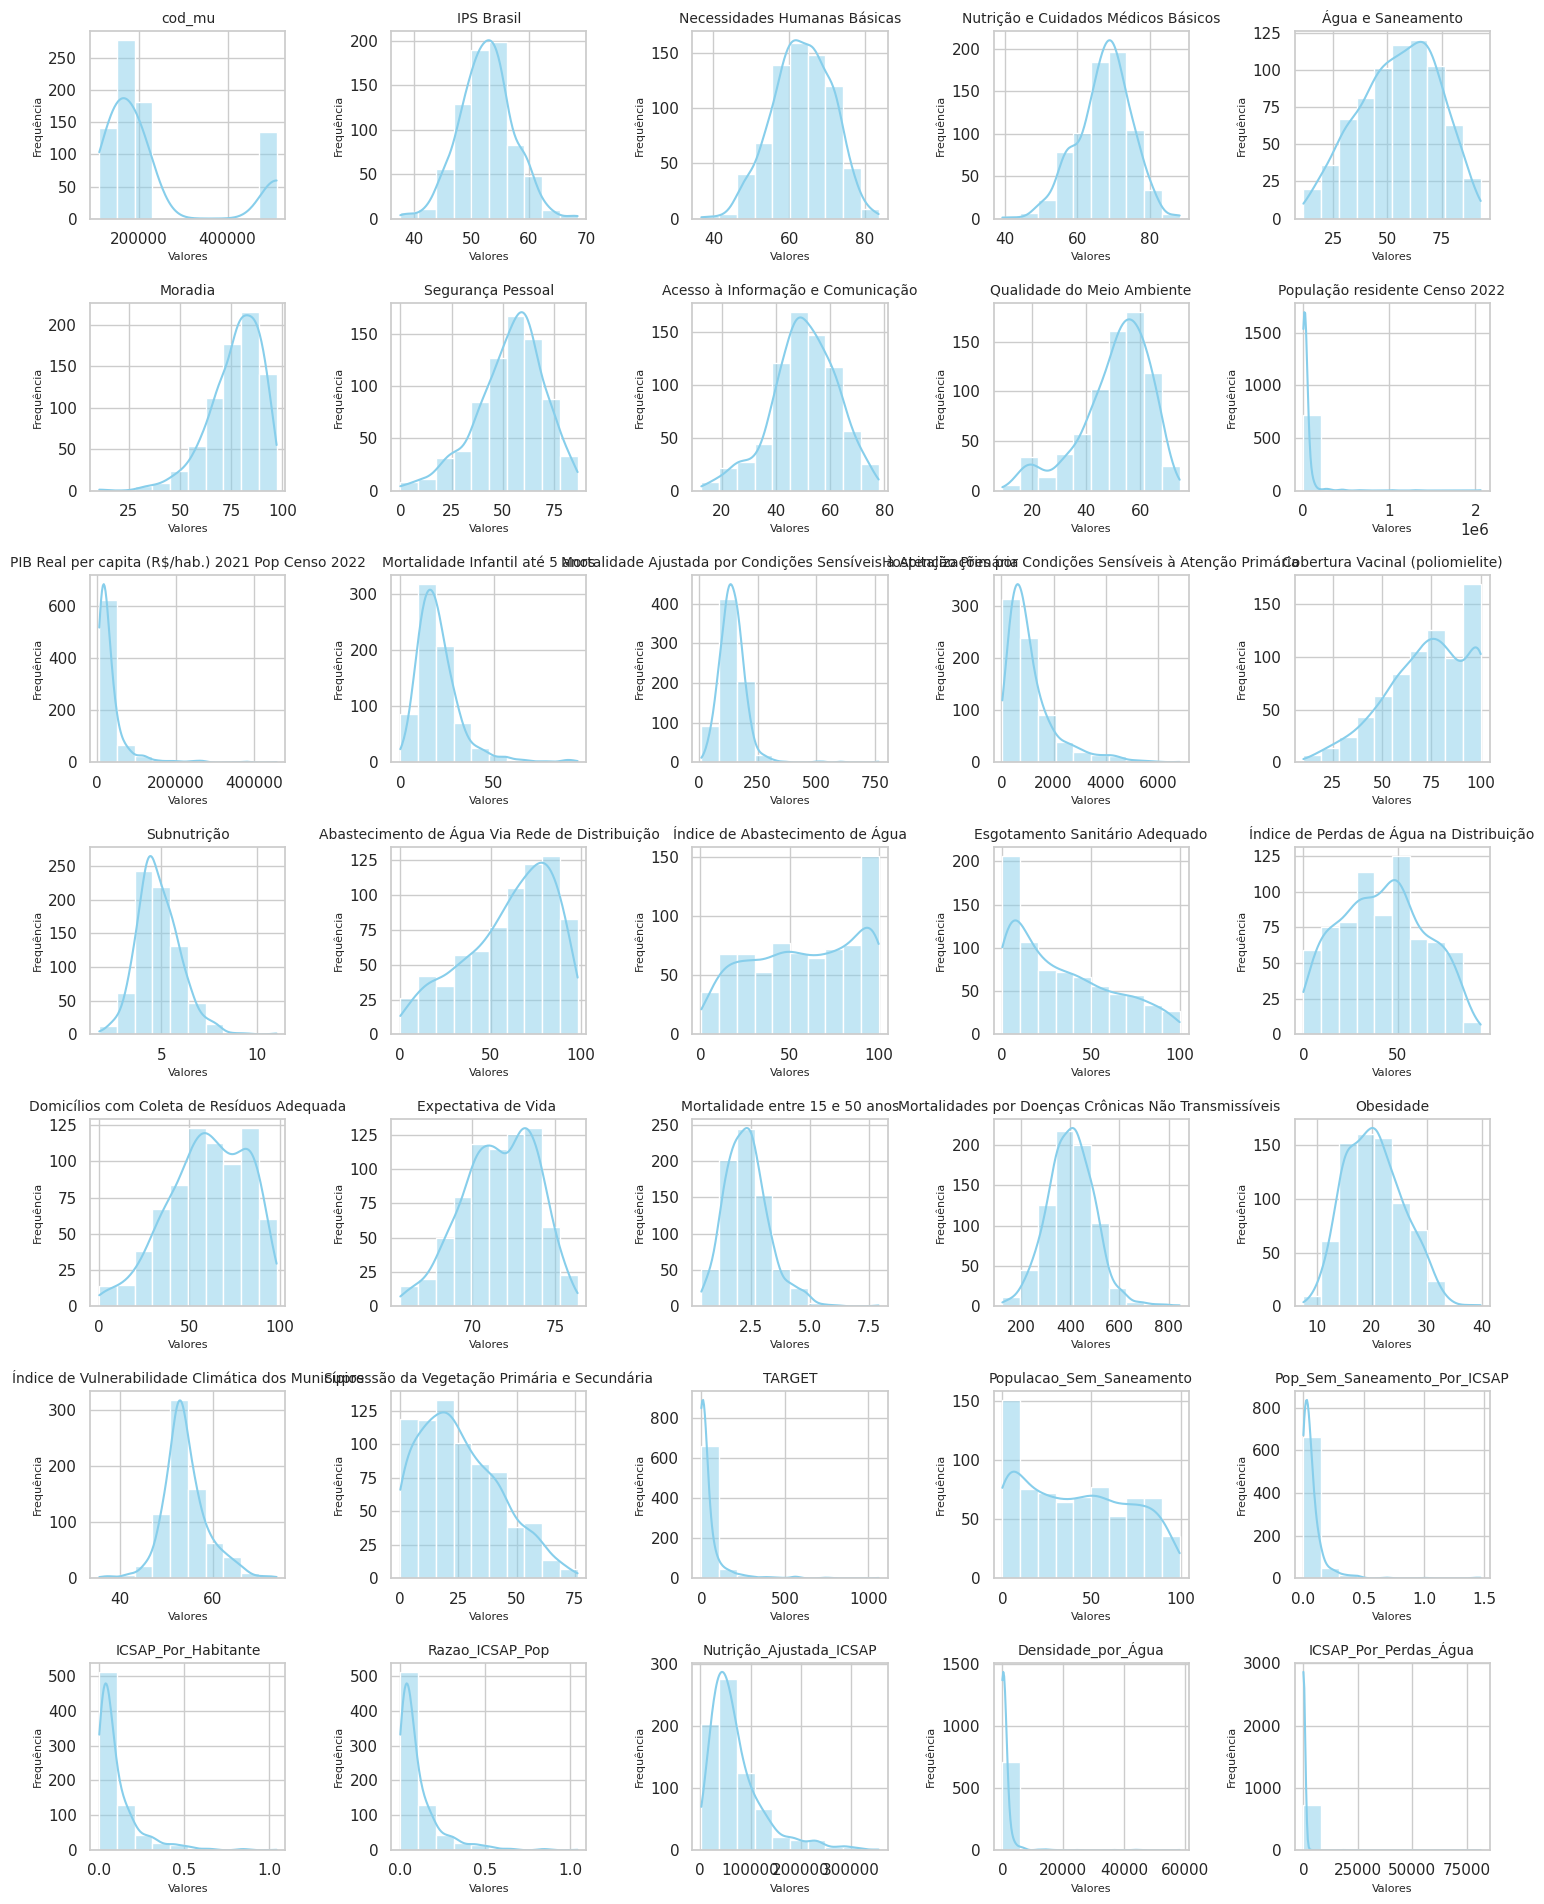

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Selecionar apenas variáveis numéricas
num_vars = df.select_dtypes(include=['float64', 'int64']).columns
num_vars_count = len(num_vars)

# Configuração dos subplots: 7 linhas e 5 colunas
cols = 5  # Número de colunas
rows = 7  # Número de linhas
fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
axes = axes.flatten()

# Criar um histograma para cada variável numérica
for i, col in enumerate(num_vars):
    sns.histplot(df[col], bins=10, kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("Valores", fontsize=8)
    axes[i].set_ylabel("Frequência", fontsize=8)

# Remover subplots vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar layout e adicionar título geral
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


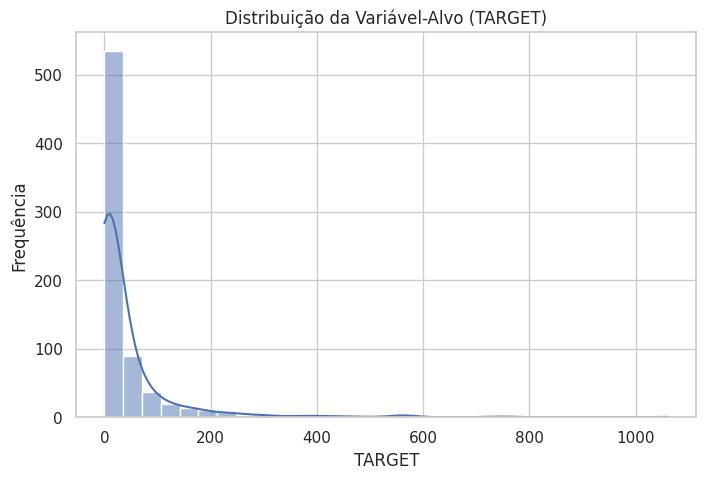

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verificando a distribuição do TARGET
plt.figure(figsize=(8, 5))
sns.histplot(df['TARGET'], bins=30, kde=True)  # Substitua 'TARGET' pelo nome correto
plt.title("Distribuição da Variável-Alvo (TARGET)")
plt.xlabel("TARGET")
plt.ylabel("Frequência")
plt.show()


##**4.2. Transformação da Variável-Alvo**

*   A variável taxa de mortalidade por diarreia foi transformada em escala logarítmica para estabilizar a variabilidade e melhorar o desempenho dos modelos de regressão.



##**4.2.1. transformação logarítmica**

*   Com base no histograma que você forneceu, podemos observar que a distribuição
da variável-alvo (TARGET) é altamente assimétrica, com muitos valores concentrados em faixas baixas e alguns valores muito altos (outliers).
*  Neste caso, a transformação logarítmica é altamente recomendada para estabilizar a variância e facilitar o treinamento dos modelos. Isso ajudará a reduzir o impacto desproporcional dos outliers durante a otimização.


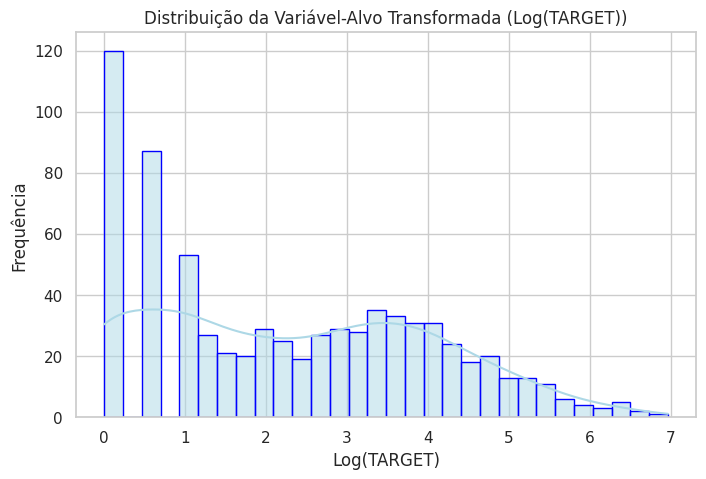

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicando a transformação logarítmica no TARGET
df['TARGET_LOG'] = np.log1p(df['TARGET'])

# Verificando novamente a distribuição após a transformação
plt.figure(figsize=(8, 5))
sns.histplot(df['TARGET_LOG'], bins=30, kde=True,
             color="lightblue", edgecolor="blue")  # Definindo cores das barras e do contorno
plt.title("Distribuição da Variável-Alvo Transformada (Log(TARGET))")
plt.xlabel("Log(TARGET)")
plt.ylabel("Frequência")
plt.show()



##**4.3. Redução de Dimensionalidade com PCA(Principal Component Analysis) para seleção de variáveis:**

Foi aplicada a Análise de Componentes Principais (PCA) para reduzir a dimensionalidade, mantendo a variabilidade explicada.

*   Foi aplicada a Análise de Componentes Principais (PCA) para reduzir a dimensionalidade, mantendo a variabilidade explicada.
*  Após o PCA, o conjunto ficou com as variáveis mais relevantes, so usarei ate a variavel PCA6


In [ ]:
!pip install catboost

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import plotly.express as px
# Assuming your original data is in a DataFrame called 'df'
# Replace 'df' with the actual name of your DataFrame if different
X = df  # Assign your DataFrame to X
# Separar a coluna 'cod_mu' antes de escalar os dados
cod_mu = X['cod_mu']
X_without_cod = X.drop('cod_mu', axis=1)

# Escalar os dados (exceto 'cod_mu')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_without_cod)

# Aplicar PCA mantendo 95% da variância explicada
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Converter os dados transformados de volta para DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])

# Reanexar a coluna 'cod_mu' ao conjunto de dados reduzido
X_pca_df['cod_mu'] = cod_mu.values

# Variância explicada por componente
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance = np.cumsum(explained_variance_ratio) * 100
components = [f"PC{i+1}" for i in range(len(explained_variance))]

# Criar DataFrame com variância explicada
pca_df = pd.DataFrame({
    "Component": components,
    "Explained Variance (%)": explained_variance_ratio * 100,
    "Cumulative Variance (%)": explained_variance
})

# Criar DataFrame para os pesos (cargas) das variáveis originais
loadings = pd.DataFrame(
    pca.components_.T,  # Transpor para que cada coluna seja um PC
    columns=components,  # Nome dos PCs
    index=X_without_cod.columns  # Nome das variáveis originais
)

# Adicionar variáveis mais importantes para cada PC na tabela principal
def top_variables_for_pc(loadings, pc, n=5):
    """Retorna as N variáveis mais importantes para um componente principal (PC)."""
    top_vars = loadings[pc].abs().sort_values(ascending=False).head(n).index.tolist()
    return ", ".join(top_vars)

# Adicionar as variáveis mais relevantes para cada componente principal
pca_df["Top Variables"] = [top_variables_for_pc(loadings, pc) for pc in components]

# Exibir a tabela com as variâncias e variáveis associadas
print("\nTabela de Componentes Principais e Variáveis Associadas:")
print(pca_df)

# Plotar o gráfico de variância explicada
fig = px.bar(
    pca_df,
    x="Component",
    y="Explained Variance (%)",
    text="Explained Variance (%)",
    title="Importância dos Componentes Principais (PCA)",
    labels={"Component": "Componente Principal", "Explained Variance (%)": "Importância (%)"},
    width=900,
    height=600
)

# Ajustar estilo do gráfico
fig.update_traces(
    marker=dict(color="lightblue", line=dict(color="darkblue", width=1.5))
)
fig.update_layout(
    xaxis_title="Componente Principal",
    yaxis_title="Importância (%)",
    plot_bgcolor="white",
    paper_bgcolor="white"
)

fig.show()

# Exibir as primeiras linhas do conjunto de dados reduzido com 'cod_mu'
print("\nDados com os Componentes Principais e 'cod_mu':")
print(X_pca_df.head())



Tabela de Componentes Principais e Variáveis Associadas:
   Component  Explained Variance (%)  Cumulative Variance (%)  \
0        PC1               20.230150                20.230150   
1        PC2               11.985315                32.215465   
2        PC3                8.232036                40.447501   
3        PC4                6.764852                47.212353   
4        PC5                5.216074                52.428428   
5        PC6                5.120431                57.548859   
6        PC7                3.647964                61.196822   
7        PC8                3.482013                64.678835   
8        PC9                3.221157                67.899992   
9       PC10                2.753114                70.653107   
10      PC11                2.578410                73.231516   
11      PC12                2.516433                75.747950   
12      PC13                2.457978                78.205928   
13      PC14                2.31


Dados com os Componentes Principais e 'cod_mu':
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.207552  1.038284  0.753750 -1.395847 -0.756970  1.638340 -0.213109   
1  2.370016  0.253599 -1.894831 -2.106167 -0.230030  0.311741  0.330412   
2 -0.574849  1.822658  3.460545 -2.248006 -0.505757  1.584430 -0.261098   
3  3.360450  1.287727 -2.583235 -0.504239 -1.167548 -0.295530 -0.126314   
4  1.817095  0.524159  0.194935 -1.540951 -2.105057  0.603537 -0.174302   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.144596 -0.481117 -1.146344 -0.323981  1.096852  0.492971 -0.091203   
1  0.267246  0.306271 -1.613718 -0.809509  0.288608  0.937059 -0.533114   
2  0.275925  0.029713  0.413466 -0.334821  0.274056 -0.949727  0.145038   
3  1.056780 -0.982926  0.124047 -0.110785  0.096275  0.268708  0.113639   
4 -1.022454 -1.177407 -1.339717  0.264490 -0.143618 -0.685776  0.429936   

       PC15      PC16      PC17      PC18      PC

##**5.0. Data Mining**


##**5.1. Foram treinados os seguintes modelos de regressão: Random Forest, XGBoost, LightGBM, CatBoost**

*   Validação cruzada com DE 10 FOLDS


Treinando e avaliando modelo: Random Forest com validação cruzada (10 folds)...
Treinando e avaliando modelo: XGBoost com validação cruzada (10 folds)...
Treinando e avaliando modelo: LightGBM com validação cruzada (10 folds)...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000526 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5074
[LightGBM] [Info] Number of data points in the train set: 661, number of used features: 23
[LightGBM] [Info] Start training from score 2.300978
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

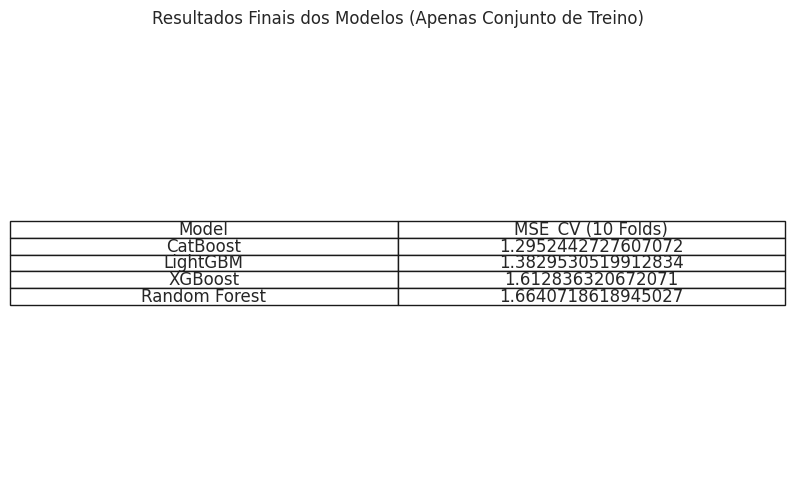

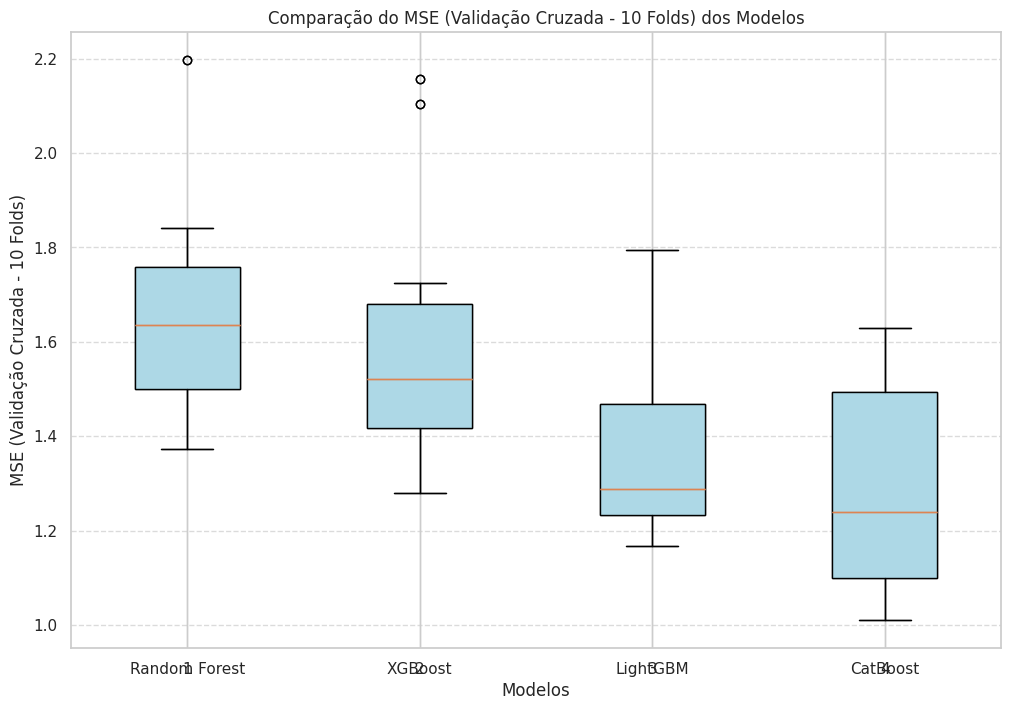

In [ ]:
# Importação de bibliotecas
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# **Passo 1: Variáveis explicativas (X) e variável-alvo (y)**
X = df.drop('TARGET_LOG', axis=1)  # Substitua por suas colunas explicativas
y = df['TARGET_LOG']  # Variável-alvo

# **Passo 2: Escalonamento e PCA aplicados SOMENTE no conjunto completo de treino**
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Ajustar e transformar no conjunto de treino completo

# Aplicar PCA no conjunto de treino completo
pca = PCA(n_components=23)  # Ajuste para 23 componentes principais
X_pca = pca.fit_transform(X_scaled)

# **Passo 3: Modelos a serem avaliados**
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42),
}

# **Passo 4: Avaliação dos modelos com validação cruzada**
results = []
mse_cv_results = []
names = []
for name, model in models.items():
    print(f"Treinando e avaliando modelo: {name} com validação cruzada (10 folds)...")

    # Validação cruzada com 10 folds (apenas no treino)
    mse_cv = -cross_val_score(model, X_pca, y, cv=10, scoring="neg_mean_squared_error")
    mse_cv_mean = mse_cv.mean()
    mse_cv_results.append(mse_cv)  # Armazena os valores de MSE para o box plot

    # Armazenando os resultados
    results.append({
        "Model": name,
        "MSE_CV (10 Folds)": mse_cv_mean
    })
    names.append(name)

# **Passo 5: Exibir resultados**
results_df = pd.DataFrame(results).sort_values(by="MSE_CV (10 Folds)")

print("\nTabela de Resultados dos Modelos:")
print(results_df)

# Exibir tabela de resultados como gráfico
plt.figure(figsize=(10, 6))
plt.axis('off')
plt.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
plt.title("Resultados Finais dos Modelos (Apenas Conjunto de Treino)")
plt.show()

# **Passo 6: Boxplot de comparação dos modelos**
plt.figure(figsize=(12, 8))
plt.boxplot(mse_cv_results, labels=names, patch_artist=True, vert=True)

# Customização do Box Plot
for box in plt.boxplot(mse_cv_results, patch_artist=True)['boxes']:
    box.set(facecolor='lightblue')  # Define a cor das caixas

plt.title("Comparação do MSE (Validação Cruzada - 10 Folds) dos Modelos")
plt.ylabel("MSE (Validação Cruzada - 10 Folds)")
plt.xlabel("Modelos")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Verificar se a coluna 'cod_mu' está presente no DataFrame
if 'cod_mu' in df.columns:
    print("A coluna 'cod_mu' está presente no DataFrame.")
else:
    print("A coluna 'cod_mu' NÃO está presente no DataFrame.")


A coluna 'cod_mu' está presente no DataFrame.


**melhores hiperametros / gerando a tabela de experimento**

##**5.2. Busca de Hiperparâmetros e Resultados**



*   Gerar a tabela do plano de experiemnto
*   gerar tabela dos melhroes modelos com base no MSE da validação crizada




In [ ]:
!pip install lightgbm

In [ ]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

all_results = []

# Separação inicial em treino e teste (Holdout)
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=7)

# Garantir que o conjunto de teste não será usado até a etapa de avaliação final
# Daqui em diante, somente X_train e y_train serão usados.

# KFold para validação cruzada
num_particoes = 10  # Número de divisões para o KFold
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7)

# 1. Configuração e busca de hiperparâmetros para RandomForestRegressor
print("\n--- Busca de hiperparâmetros para Random Forest ---")
rf = RandomForestRegressor(random_state=7)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='neg_mean_squared_error', cv=kfold)
grid_rf.fit(X_train, y_train)  # SOMENTE DADOS DE TREINO

# Armazenando os resultados do Random Forest
for i in range(len(grid_rf.cv_results_['params'])):
    params = grid_rf.cv_results_['params'][i]
    mse = -grid_rf.cv_results_['mean_test_score'][i]
    rmse = np.sqrt(mse)
    mae = np.nan  # MAE não calculado diretamente nos folds
    r2 = np.nan  # R² não calculado diretamente nos folds

    all_results.append({
        'Model': 'Random Forest',
        'n_estimators': params['n_estimators'],
        'max_depth': params['max_depth'],
        'min_samples_split': params['min_samples_split'],
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    })

# 2. Configuração e busca de hiperparâmetros para XGBRegressor
print("\n--- Busca de hiperparâmetros para XGBoost ---")
xgb = XGBRegressor(random_state=7)
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, scoring='neg_mean_squared_error', cv=kfold)
grid_xgb.fit(X_train, y_train)  # SOMENTE DADOS DE TREINO

# Armazenando os resultados do XGBoost
for i in range(len(grid_xgb.cv_results_['params'])):
    params = grid_xgb.cv_results_['params'][i]
    mse = -grid_xgb.cv_results_['mean_test_score'][i]
    rmse = np.sqrt(mse)
    mae = np.nan
    r2 = np.nan

    all_results.append({
        'Model': 'XGBoost',
        'n_estimators': params['n_estimators'],
        'learning_rate': params['learning_rate'],
        'max_depth': params['max_depth'],
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    })

# 3. Configuração e busca de hiperparâmetros para LightGBM
print("\n--- Busca de hiperparâmetros para LightGBM ---")
lgbm = LGBMRegressor(random_state=7)
param_grid_lgbm = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgbm, scoring='neg_mean_squared_error', cv=kfold)
grid_lgbm.fit(X_train, y_train)  # SOMENTE DADOS DE TREINO

# Armazenando os resultados do LightGBM
for i in range(len(grid_lgbm.cv_results_['params'])):
    params = grid_lgbm.cv_results_['params'][i]
    mse = -grid_lgbm.cv_results_['mean_test_score'][i]
    rmse = np.sqrt(mse)
    mae = np.nan
    r2 = np.nan

    all_results.append({
        'Model': 'LightGBM',
        'n_estimators': params['n_estimators'],
        'learning_rate': params['learning_rate'],
        'max_depth': params['max_depth'],
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    })

# 4. Configuração e busca de hiperparâmetros para CatBoost
print("\n--- Busca de hiperparâmetros para CatBoost ---")
catboost = CatBoostRegressor(verbose=0, random_state=7)
param_grid_catboost = {
    'iterations': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8]
}
grid_catboost = GridSearchCV(estimator=catboost, param_grid=param_grid_catboost, scoring='neg_mean_squared_error', cv=kfold)
grid_catboost.fit(X_train, y_train)  # SOMENTE DADOS DE TREINO

# Armazenando os resultados do CatBoost
for i in range(len(grid_catboost.cv_results_['params'])):
    params = grid_catboost.cv_results_['params'][i]
    mse = -grid_catboost.cv_results_['mean_test_score'][i]
    rmse = np.sqrt(mse)
    mae = np.nan
    r2 = np.nan

    all_results.append({
        'Model': 'CatBoost',
        'iterations': params['iterations'],
        'learning_rate': params['learning_rate'],
        'depth': params['depth'],
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    })

# Convertendo os resultados em DataFrame
results_df = pd.DataFrame(all_results)

# Exibindo a tabela completa de resultados
print("\nTabela de Comparação de Modelos e Resultados de Hiperparâmetros:")
display(results_df)

# Encontrando a melhor combinação de parâmetros para cada modelo com base no menor MSE
best_models = results_df.loc[results_df.groupby('Model')['MSE'].idxmin()]
print("\n--- Melhor combinação de parâmetros para cada modelo com base no MSE ---")
display(best_models)


A saída de streaming foi truncada nas últimas 5000 linhas.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

,Model,n_estimators,max_depth,min_samples_split,MSE,RMSE,MAE,R²,learning_rate,iterations,depth
0,Random Forest,50.0,NaN,2.0,0.001473,0.038383,NaN,NaN,NaN,NaN,NaN
1,Random Forest,100.0,NaN,2.0,0.001545,0.039301,NaN,NaN,NaN,NaN,NaN
2,Random Forest,200.0,NaN,2.0,0.001399,0.037407,NaN,NaN,NaN,NaN,NaN
3,Random Forest,50.0,NaN,5.0,0.001397,0.037378,NaN,NaN,NaN,NaN,NaN
4,Random Forest,100.0,NaN,5.0,0.001389,0.037275,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
103,CatBoost,NaN,NaN,NaN,0.058320,0.241496,NaN,NaN,0.10,100.0,8.0
104,CatBoost,NaN,NaN,NaN,0.057628,0.240058,NaN,NaN,0.20,100.0,8.0
105,CatBoost,NaN,NaN,NaN,0.345595,0.587873,NaN,NaN,0.01,200.0,8.0
106,CatBoost,NaN,NaN,NaN,0.055430,0.235435,NaN,NaN,0.10,200.0,8.0



--- Melhor combinação de parâmetros para cada modelo com base no MSE ---


,Model,n_estimators,max_depth,min_samples_split,MSE,RMSE,MAE,R²,learning_rate,iterations,depth
88,CatBoost,NaN,NaN,NaN,0.007168,0.084666,NaN,NaN,0.1,200.0,4.0
69,LightGBM,50.0,7.0,NaN,0.011172,0.105697,NaN,NaN,0.1,NaN,NaN
23,Random Forest,200.0,10.0,5.0,0.001329,0.036451,NaN,NaN,NaN,NaN,NaN
44,XGBoost,200.0,7.0,NaN,0.000966,0.031082,NaN,NaN,0.1,NaN,NaN


##**5.3. Testar a generalização do melhor nos dados do teste**

##**5.4. Compararação dos valores reais e previstos**

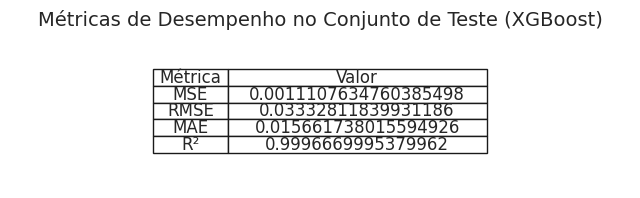

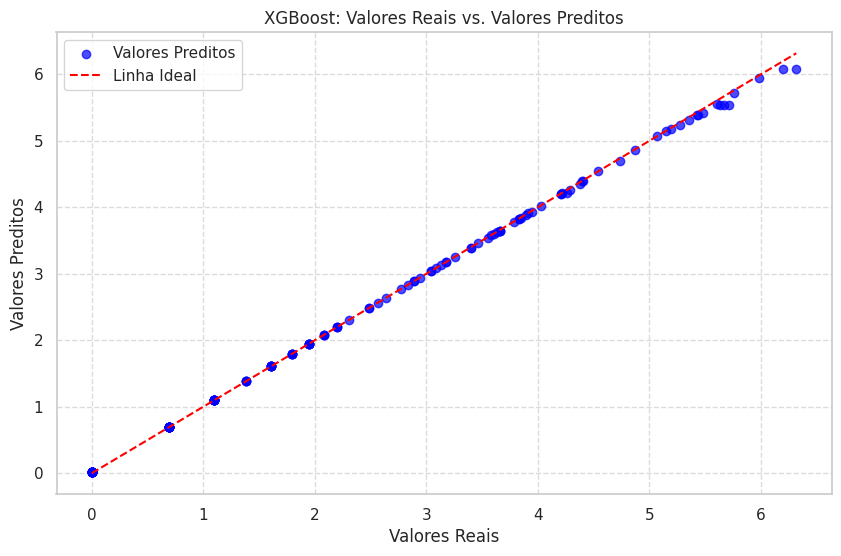

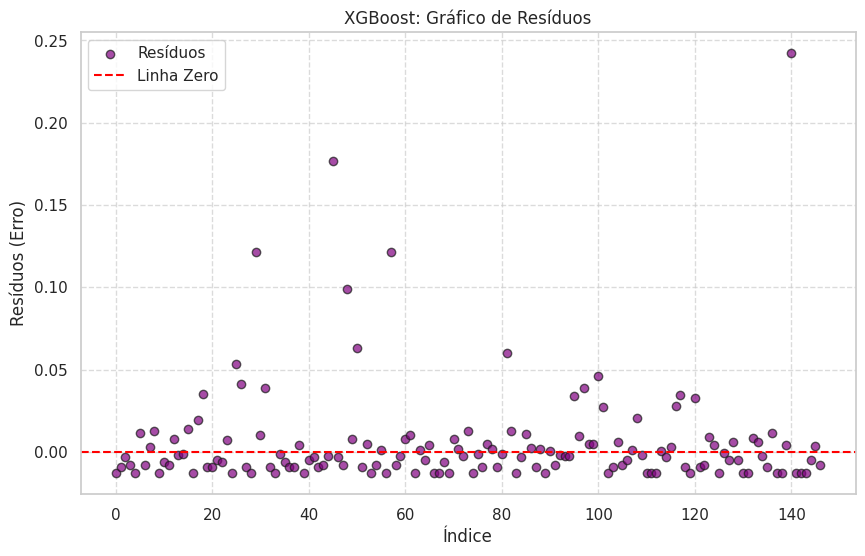

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

# Configuração do melhor modelo XGBoost com hiperparâmetros otimizados
best_xgb_model = XGBRegressor(
    n_estimators=50,  # Melhor valor encontrado
    learning_rate=0.1,
    max_depth=5,
    random_state=7
)

# Ajustar o modelo ao conjunto de treino completo
best_xgb_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = best_xgb_model.predict(X_test)

# Cálculo das métricas no conjunto de teste
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Criar DataFrame com as métricas
metrics_table = pd.DataFrame({
    "Métrica": ["MSE", "RMSE", "MAE", "R²"],
    "Valor": [mse, rmse, mae, r2]
})

# Exibir a tabela como um gráfico
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')
table = ax.table(
    cellText=metrics_table.values,
    colLabels=metrics_table.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(metrics_table.columns))))
plt.title("Métricas de Desempenho no Conjunto de Teste (XGBoost)", fontsize=14)
plt.show()

# Gráfico 1: Valores Reais vs. Valores Preditos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Valores Preditos", color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Linha Ideal")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("XGBoost: Valores Reais vs. Valores Preditos")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Gráfico 2: Gráfico de Resíduos
residuals = y_test - y_pred  # Calculando os resíduos (erros)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals, alpha=0.7, label="Resíduos", color='purple', edgecolor='k')
plt.axhline(0, color='red', linestyle='--', label="Linha Zero")
plt.xlabel("Índice")
plt.ylabel("Resíduos (Erro)")
plt.title("XGBoost: Gráfico de Resíduos")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

